# **Question 1**

In [1]:
# Importing Required Packages

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Fixing T and delta

T = 1000
delta = 0.1

In [3]:
# Function to truncate floating point numbers to 2 decimal places for neatness

def truncate(fl_no):
    return int(100*fl_no)/100

In [4]:
# Function to take T and delta as input and return the number of exploration rounds T_0 that minimises regret for ETC

def return_analytical_best_T0(T, delta):
    return int(np.ceil(4/delta**2 * np.log((T*delta**2)/4)))

In [5]:
# Print best value of T_0
best_analytical_T0 = return_analytical_best_T0(T, delta)
print("Best value of T_0 needed to minimise regret =", best_analytical_T0)

Best value of T_0 needed to minimise regret = 367


In [6]:
# Function that takes T, delta, and std.dev of d=2 Gaussian arms
# Runs ETC parallelly on the 10000 runs

# Returns a regret array of size 10000 x T/2, as we wish to store the cumulative
# regret of ETC for each T_0 from 2 to T in steps of 2 (total T/2 values of T_0)
# (we consider T_0 values that are a multiple of d=2 for simplicity)

def ETC_return_regret_array(T, delta, gaus_sigma):

    # Initialising the bandit setup
    mu1 = 0
    mu2 = mu1+delta
    mus = np.array([mu1, mu2])
    mu_star = min(mus)
    deltas = np.abs(mus-mu_star)

    sigma = gaus_sigma

    # Initialising  mu_hat values (estimates of mean loss of the arms)
    mu_hat = np.array([0,0])
    num_runs = 10000

    # Initialising regret array
    regret_array = np.zeros((num_runs, T//2))

    # Generating the runs of actual returned rewards at all timesteps in advance,
    # to speed up the 'for' loop
    generated_exploration_runs = np.random.normal(loc = mus, 
                                                  scale = [sigma,sigma], 
                                                  size = (num_runs, (T//2), 2))

    print(f"Gaussian Sigma^2 = {truncate(gaus_sigma**2)}. T = {T}.")
    print(u"Iterating over values of T\u2080 upto T...")

    # Iterating over values of T_0
    for T0 in range(2, T+1, 2):
        if T0%100 == 0:
            print(u"T\u2080 =", T0, "done")

        regrets = []
        # Storing the mu-hat 2-vector for each of the 10000 runs. 
        # For each arm, we average the first T_0/2 values, since each arm is picked T_0/2 times during exploration
        mu_hat = np.mean(generated_exploration_runs[:, :T0//2, :], axis = 1)

        # Storing the number of times played of each arm in each run (all = T_0/2)
        num_of_times_played = np.ones((num_runs, 2))*(T0//2)
        

        # Picking best arm based on exploration using the mu_hat estimates
        # Parallelly for all 10000 runs
        picked_arm = np.argmin(mu_hat, axis = 1)

        # Storing the value of the "expectation definition" of regret for all 10000 runs for the current timestep
        regret_array[:, (T0//2)-1] += np.sum(deltas*num_of_times_played, axis=1) + (T-T0)*deltas[picked_arm]

    print()

    del generated_exploration_runs

    return regret_array

In [7]:
# Storing a list of default matplotlib.pyplot colours, for better errorbar plotting

plot_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [8]:
# Function to print the value of T_0 that minimises the regret based on mean of the regret array across 10000 runs
# Also, to plot the same mean regret vs T_0 (0.1*std. dev. errorbars are included in the next function)
# Not doing plt.show() yet. It will help us plot all plots for all sigma values in one figure, in part 4 of this question.

def plot_print(T, delta, gaus_sigma, regret_mean, regret_std, color):

    best_T0 = 2*(np.argmin(regret_mean)+1)
    print(u"Best value of T\u2080 that minimises regret =", best_T0)

    x_axis = np.arange(2,T+1,2)
    plt.plot(x_axis, regret_mean, label=f"Regret $\pm 0.1$ std. $(\sigma^2={truncate(gaus_sigma**2)})$" , color = color, zorder = 0)    
    
    print("________________________________________________________")

    return best_T0, x_axis

In [9]:
# Function to take in T, delta, sigma of gaussian arm, and color of the plot
# Plots the errorbar on the plot object
# Returns the best T_0 based on the mean regret vs T_0 array

def ETC_return_best_T0(T, delta, gaus_sigma, color, errorbar_step):
    regret_array = ETC_return_regret_array(T, delta, gaus_sigma)
    regret_mean = np.mean(regret_array, axis = 0)
    regret_std = np.std(regret_array, axis = 0)

    best_T0, x_axis = plot_print(T, delta, gaus_sigma, regret_mean, regret_std, color)

    step = errorbar_step
    plt.errorbar(x_axis[::step], regret_mean[::step], 0.1*regret_std[::step], fmt='o',
                 color = color, linewidth = 1, markersize=4, capsize=3, zorder = -0.1)

    return best_T0

Gaussian Sigma^2 = 1.0. T = 1000.
Iterating over values of T₀ upto T...
T₀ = 100 done
T₀ = 200 done
T₀ = 300 done
T₀ = 400 done
T₀ = 500 done
T₀ = 600 done
T₀ = 700 done
T₀ = 800 done
T₀ = 900 done
T₀ = 1000 done

Best value of T₀ that minimises regret = 296
________________________________________________________


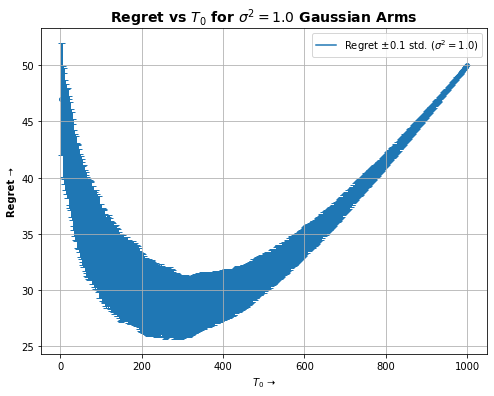

In [10]:
# Running ETC for delta = 0.1, T = 1000, sigma^2 = 1, and plotting the regret vs T_0
# with errorbars for each value of T_0

plt.figure(figsize=(8,6))
best_T0_sigma_1 = ETC_return_best_T0(T, delta, gaus_sigma=1, color = plot_colors[0], errorbar_step = 1)
plt.grid(True)
plt.title(f"Regret vs $T_0$ for $\sigma^2={truncate(1**2)}$ Gaussian Arms", fontweight = "bold", fontsize = 14)
plt.ylabel("Regret \u279d", fontweight = 'bold')
plt.xlabel("$T_0$ \u279d", fontweight = 'bold')
plt.legend()
plt.show()

Gaussian Sigma^2 = 0.01. T = 1000.
Iterating over values of T₀ upto T...
T₀ = 100 done
T₀ = 200 done
T₀ = 300 done
T₀ = 400 done
T₀ = 500 done
T₀ = 600 done
T₀ = 700 done
T₀ = 800 done
T₀ = 900 done
T₀ = 1000 done

Best value of T₀ that minimises regret = 28
________________________________________________________
Gaussian Sigma^2 = 0.09. T = 1000.
Iterating over values of T₀ upto T...
T₀ = 100 done
T₀ = 200 done
T₀ = 300 done
T₀ = 400 done
T₀ = 500 done
T₀ = 600 done
T₀ = 700 done
T₀ = 800 done
T₀ = 900 done
T₀ = 1000 done

Best value of T₀ that minimises regret = 126
________________________________________________________
Gaussian Sigma^2 = 1.0. T = 1000.
Iterating over values of T₀ upto T...
T₀ = 100 done
T₀ = 200 done
T₀ = 300 done
T₀ = 400 done
T₀ = 500 done
T₀ = 600 done
T₀ = 700 done
T₀ = 800 done
T₀ = 900 done
T₀ = 1000 done

Best value of T₀ that minimises regret = 262
________________________________________________________
Gaussian Sigma^2 = 9.0. T = 1000.
Iterating over va

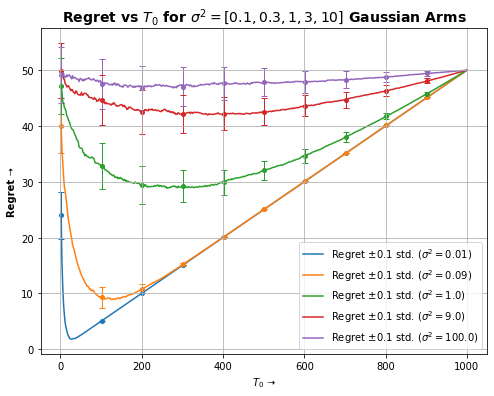

In [34]:
# Trying different values of sigma (0.01, 0.09, 1, 9, 100) for the same problem 
# as above, and plotting the regret vs T_0 plots.
# With errorbars plotted at once every 100 steps in T_0 for clarity

trial_sigmas = np.array([0.1, 0.3, 1, 3, 10])
list_of_best_T0s = []

plt.figure(figsize=(8,6))
for i, sigma in enumerate(trial_sigmas):
    list_of_best_T0s.append(ETC_return_best_T0(T, delta, gaus_sigma=sigma, color=plot_colors[i], errorbar_step = 50))

plt.grid(True)
plt.title(f"Regret vs $T_0$ for $\sigma^2={[0.1, 0.3, 1, 3, 10]}$ Gaussian Arms", fontweight = "bold", fontsize = 14)
plt.ylabel("Regret \u279d", fontweight = 'bold')
plt.xlabel("$T_0$ \u279d", fontweight = 'bold')
plt.legend()
plt.show()


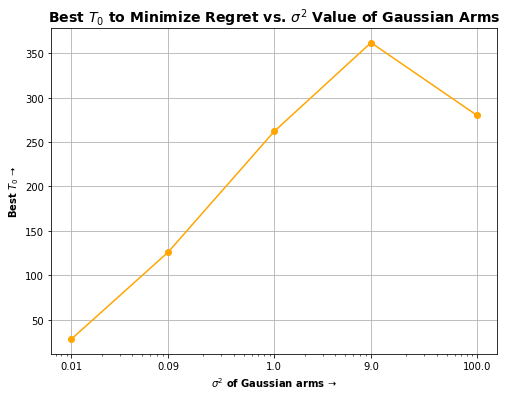

In [35]:
# Plotting the change of best_T0 value as we increase sigma^2

sigma_squares = [truncate(variance) for variance in trial_sigmas**2]

plt.figure(figsize=(8,6))
plt.semilogx(sigma_squares, list_of_best_T0s, 'o-', color='orange')
plt.xticks(ticks = sigma_squares, labels = sigma_squares)
plt.ylabel("Best $T_0$ \u279d", fontweight = 'bold')
plt.xlabel("$\sigma^2$ of Gaussian arms \u279d", fontweight = 'bold')
plt.title("Best $T_0$ to Minimize Regret vs. $\sigma^2$ Value of Gaussian Arms", fontweight = 'bold', fontsize = 14)
plt.grid(True)
plt.show()

______________________________________________________________

# **Question 2**

In [13]:
# Importing required packages

import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Function to truncate floating point numbers

def truncate(fl_no):
    return int(100*fl_no)/100

In [15]:
# Fixing T and delta for Question 2

T2 = 10000
delta2 = 0.1

In [16]:
# Setting sigma = 1 (standard Gaussian setting as in Q1)
# Setting number of runs = 1000 to get a balance between running time of program
# and averaging effect on regret curves

sigma = 1
num_runs2 = 1000

## UCB

In [17]:
# Function to do UCB on the standard Gaussian 2-arm setting given T and delta
# Returns an array of regrets for all runs at each time step

def UCB(T2, delta2):
    # Initialising the bandit setup
    mu1 = 0
    mu2 = mu1+delta2
    mus = np.array([mu1, mu2])
    mu_star = min(mus)
    deltas2 = np.abs(mus-mu_star)

    # Initialising the regret array for 10000 runs x T timesteps as needed now. 
    regret_array = np.zeros((num_runs2, T2))
    # Generate the losses of each arm for all runs and all timesteps in advance
    # to avoid generation in the 'for' loop
    generated_runs = np.random.normal(loc = mus, scale = [sigma,sigma], size = (num_runs2, T2, 2))

    # Setting mu_hats for all 10000 runs and 2 arms, to be the first timestep values
    mu_hats = generated_runs[:, 0, :]
    num_arms = mu_hats.shape[1]

    # Initialising number of picks of each arm in each run as 0
    num_picks = np.zeros((num_runs2, 2))

    # The first d=2 rounds are spent picking each arm once. 
    # Correspondingly, the num_picks array and regret values for these timesteps is updated
    for i in range(num_arms):
        num_picks[:,i] += 1
        regret_array[:,i] += np.sum(deltas2*num_picks, axis = 1)

    # Print statements to mark progress
    print(f"Gaussian Sigma^2 = 1. T = {T2}. Delta = {delta2}")
    print(f"Picked each of the {num_arms} arms once.")
    print(f"Iterating from t = {num_arms+1} to T...")

    one_hot_generator = np.eye(2)
    
    # Iterating over all time steps after d= 2
    for t in range(num_arms+1, T2+1):
        if t%1000 == 0:
            print("t =", t, "done")

        # UCB RULE TO PICK BEST ARM, applied across all runs
        picked_arms = np.argmin(mu_hats-np.sqrt(2*np.log(t)/num_picks), axis=1)

        # Generating a list of one-hot-vectors corresponding to each run's arm choice
        # using the 2*2 identity matrix
        picked_mask = one_hot_generator[picked_arms, :]

        # Extracting the actual received losses in each run at the timestep according to picked arm
        all_losses = generated_runs[:, t-1, :]
        received_losses = all_losses*picked_mask
        
        # Generating the new mu_hats at these positions of the picked arms in each run
        # according to the loss values observed
        old_num_picks = num_picks.copy()
        num_picks_update = one_hot_generator[picked_arms, :]
        num_picks += num_picks_update

        mu_hats = (old_num_picks*mu_hats + received_losses)/num_picks
        
        # Storing the value of the "expectation definition" of regret for all 10000 runs for the current timestep
        regret_array[:,t-1] += np.sum(deltas2*num_picks, axis = 1)
        
    print()
    del generated_runs
    
    return regret_array

In [18]:
# Running UCB and generating regret array for T=10000, delta = 0.1

UCB_regret_array = UCB(T2, delta2)

Gaussian Sigma^2 = 1. T = 10000. Delta = 0.1
Picked each of the 2 arms once.
Iterating from t = 3 to T...
t = 1000 done
t = 2000 done
t = 3000 done
t = 4000 done
t = 5000 done
t = 6000 done
t = 7000 done
t = 8000 done
t = 9000 done
t = 10000 done



In [19]:
print(UCB_regret_array.shape)

(1000, 10000)


In [20]:
plot_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [21]:
# A function to generate the plot objects of the regret curves
# Not doing plt.show() yet. It will help us plot all plots for all 
# delta values in one figure, in the final part of this question.

def regret_plotter(regret_array, delta, idx):

    regret_mean = np.mean(regret_array, axis = 0)
    regret_std = np.std(regret_array, axis = 0)

    x_axis = range(1, len(regret_mean)+1)
    plt.plot(x_axis, regret_mean, color = plot_colors[idx], label=f"$\Delta=${truncate(delta)}")
    step = 1000
    plt.errorbar(x_axis[::step], regret_mean[::step], 0.1*regret_std[::step], fmt='o', linewidth = 1, markersize=4, capsize=3)
    

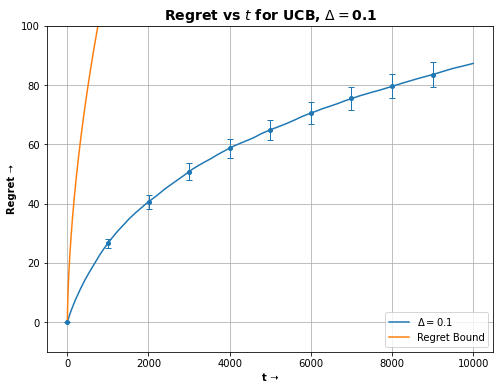

_________________________________________________


In [22]:
# Plotting the mean regret curve for UCB (delta = 0.1), with 0.1 std.dev. errorbars

plt.figure(figsize=(8,6))
regret_plotter(UCB_regret_array, delta = delta2, idx=0)
plt.title(f"Regret vs $t$ for UCB, $\Delta=${truncate(delta2)}", fontweight = "bold", fontsize = 14)
plt.plot(range(1, T2+1), np.sqrt(2*np.arange(1, T2+1)*np.log(range(1, T2+1))), label = "Regret Bound")
plt.ylabel("Regret \u279d", fontweight = 'bold')
plt.xlabel("t \u279d", fontweight = 'bold')
plt.ylim((-10,100))
plt.grid(True)
plt.legend()
plt.show()
print("_________________________________________________")

PLEASE SCROLL DOWN IN THIS CELL'S OUTPUT TO SEE THE PLOTS COMPARING UCB REGRET CURVES FOR ALL DELTAS!
Gaussian Sigma^2 = 1. T = 10000. Delta = 0.1
Picked each of the 2 arms once.
Iterating from t = 3 to T...
t = 1000 done
t = 2000 done
t = 3000 done
t = 4000 done
t = 5000 done
t = 6000 done
t = 7000 done
t = 8000 done
t = 9000 done
t = 10000 done

Gaussian Sigma^2 = 1. T = 10000. Delta = 0.2
Picked each of the 2 arms once.
Iterating from t = 3 to T...
t = 1000 done
t = 2000 done
t = 3000 done
t = 4000 done
t = 5000 done
t = 6000 done
t = 7000 done
t = 8000 done
t = 9000 done
t = 10000 done

Gaussian Sigma^2 = 1. T = 10000. Delta = 0.30000000000000004
Picked each of the 2 arms once.
Iterating from t = 3 to T...
t = 1000 done
t = 2000 done
t = 3000 done
t = 4000 done
t = 5000 done
t = 6000 done
t = 7000 done
t = 8000 done
t = 9000 done
t = 10000 done

Gaussian Sigma^2 = 1. T = 10000. Delta = 0.4
Picked each of the 2 arms once.
Iterating from t = 3 to T...
t = 1000 done
t = 2000 done
t = 

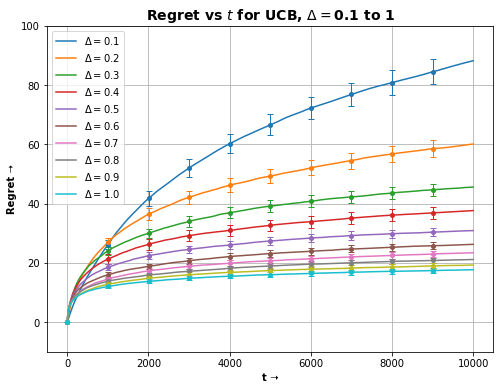

_________________________________________________


In [23]:
# Running UCB for all deltas in [0.1, 0.2, ..., 1.0], and plotting the regret curves in a single graph

print("PLEASE SCROLL DOWN IN THIS CELL'S OUTPUT TO SEE THE PLOTS COMPARING UCB REGRET CURVES FOR ALL DELTAS!")
plt.figure(figsize=(8,6))
deltas_list = np.arange(0.1, 1.1, 0.1)
for idx, delt in enumerate(deltas_list):
    UCB_regret_array_delt = UCB(T2, delt)
    regret_plotter(UCB_regret_array_delt, delta = delt, idx = idx)
plt.title(f"Regret vs $t$ for UCB, $\Delta=$0.1 to 1", fontweight = "bold", fontsize = 14)
plt.ylabel("Regret \u279d", fontweight = 'bold')
plt.xlabel("t \u279d", fontweight = 'bold')
plt.grid(True)
plt.ylim((-10,100))
plt.legend()
plt.show()
print("_________________________________________________")

## Thompson Sampling

In [24]:
# Re-importing packages and re-setting parameters for robustness

import numpy as np
import matplotlib.pyplot as plt

In [25]:
def truncate(fl_no):
    return int(100*fl_no)/100

In [26]:
T2 = 10000
delta2 = 0.1

In [27]:
true_sigma = 1
num_runs2 = 1000

In [28]:
# Function to do Thompson Sampling on the standard Gaussian 2-arm setting given T and delta
# Returns an array of regrets for all runs at each time step

def thompsonSamp(T2, delta2):

    # Initialising the true values of the bandit setup
    true_mu1 = 0
    true_mu2 = true_mu1+delta2
    true_mus = np.array([true_mu1, true_mu2])
    mu_star = min(true_mus)
    deltas2 = np.abs(true_mus-mu_star)

    # Initialising regret array
    regret_array = np.zeros((num_runs2, T2))

    # Initialising the mean and "precision" values of the Gaussian priors for each of the 10000 runs
    means_priors, precs_priors = [], []
    for i in range(num_runs2):
        means_priors.append([np.random.uniform(), np.random.uniform()])
        precs_priors.append([np.random.uniform(), np.random.uniform()])
    means_priors = np.array(means_priors)
    precs_priors = np.array(precs_priors)
    # precs -> Precisions. Precision is the reciprocal of variance

    # Storing the value of the true precision (We assume we know the variance of the likelihood function)
    # Same for both the arms in this setting
    true_prec = 1/(true_sigma**2)

    print(f"Gaussian Sigma^2 = 1. T = {T2}. Delta = {delta2}")
    print(f"Iterating from t = {1} to T...")

    # Generate the losses of each arm for all runs and all timesteps in advance
    # to avoid generation in the 'for' loop
    generated_runs = np.random.normal(loc = true_mus, 
                                      scale = [true_sigma,true_sigma], 
                                      size = (num_runs2, T2, 2))
    num_arms = len(true_mus)

    one_hot_generator = np.eye(num_arms)

    # Initialising the number of picks of each arm in each run as 0
    num_picks = np.zeros((num_runs2, num_arms))
    
    # Iterating over all timesteps
    for t in range(1, T2+1):
        if t%1000 == 0:
            print("t =", t, "done")

        # Generating the theta_t metric using the prior means and precisions
        # Picking arm by MINIMISING theta, as theta drawn according to priors is supposed to model LOSS instead of REWARD
        theta_t = np.random.normal(loc = means_priors, scale = 1/np.sqrt(precs_priors))
        picked_arms = np.argmin(theta_t, axis = 1)

        # Generating a list of one-hot-vectors corresponding to each run's arm choice
        # using the 2*2 identity matrix
        picked_arms_one_hot = one_hot_generator[picked_arms, :]
        # Updating the values of the number of picks of each arm in each run
        num_picks += picked_arms_one_hot

        # Extracting only the received losses from the already generated losses for each timestep 
        # for both arms (all runs)
        all_losses = generated_runs[:, t-1, :]
        received_losses = all_losses[range(num_runs2),picked_arms]

        # POSTERIOR PARAMETER UPDATE: Using the received losses only to update 
        # mean and precision parameters of the Gaussian priors for each arm for each run
        means_priors[range(num_runs2),picked_arms] = (precs_priors[range(num_runs2),picked_arms]*means_priors[range(num_runs2), picked_arms]
                                                      + received_losses) / (precs_priors[range(num_runs2),picked_arms] + true_prec)
        precs_priors[range(num_runs2),picked_arms] += true_prec

        # After enough of the above posterior updates, the hope is that the
        # Gaussian prior distributions settle around the true means of the loss distributions of the arms

        # Storing the value of the "expectation definition" of regret for all 10000 runs for the current timestep
        regret_array[:,t-1] += np.sum(deltas2*num_picks, axis = 1)

    print()

    del generated_runs
    
    return regret_array

In [29]:
# Running Thompson Sampling and generating regret array for T=10000, delta = 0.1

thompson_regret_array = thompsonSamp(T2, delta2)

Gaussian Sigma^2 = 1. T = 10000. Delta = 0.1
Iterating from t = 1 to T...
t = 1000 done
t = 2000 done
t = 3000 done
t = 4000 done
t = 5000 done
t = 6000 done
t = 7000 done
t = 8000 done
t = 9000 done
t = 10000 done



In [30]:
print(thompson_regret_array.shape)

(1000, 10000)


In [31]:
plot_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

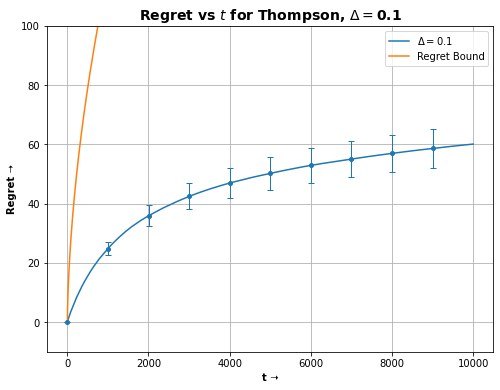

_________________________________________________


In [32]:
# Plotting the mean regret curve for Thompson Sampling (delta = 0.1), with 0.1 std.dev. errorbars

plt.figure(figsize=(8,6))
regret_plotter(thompson_regret_array, delta = delta2, idx=0)
plt.title(f"Regret vs $t$ for Thompson, $\Delta=${truncate(delta2)}", fontweight = "bold", fontsize = 14)
plt.ylabel("Regret \u279d", fontweight = 'bold')
plt.xlabel("t \u279d", fontweight = 'bold')
plt.plot(range(1, T2+1), np.sqrt(2*np.arange(1, T2+1)*np.log(range(1, T2+1))), label = "Regret Bound")
plt.grid(True)
plt.ylim((-10,100))
plt.legend()
plt.show()
print("_________________________________________________")

PLEASE SCROLL DOWN IN THIS CELL'S OUTPUT TO SEE THE PLOTS COMPARING THOMPSON REGRET CURVES FOR ALL DELTAS!
Gaussian Sigma^2 = 1. T = 10000. Delta = 0.1
Iterating from t = 1 to T...
t = 1000 done
t = 2000 done
t = 3000 done
t = 4000 done
t = 5000 done
t = 6000 done
t = 7000 done
t = 8000 done
t = 9000 done
t = 10000 done

Gaussian Sigma^2 = 1. T = 10000. Delta = 0.2
Iterating from t = 1 to T...
t = 1000 done
t = 2000 done
t = 3000 done
t = 4000 done
t = 5000 done
t = 6000 done
t = 7000 done
t = 8000 done
t = 9000 done
t = 10000 done

Gaussian Sigma^2 = 1. T = 10000. Delta = 0.30000000000000004
Iterating from t = 1 to T...
t = 1000 done
t = 2000 done
t = 3000 done
t = 4000 done
t = 5000 done
t = 6000 done
t = 7000 done
t = 8000 done
t = 9000 done
t = 10000 done

Gaussian Sigma^2 = 1. T = 10000. Delta = 0.4
Iterating from t = 1 to T...
t = 1000 done
t = 2000 done
t = 3000 done
t = 4000 done
t = 5000 done
t = 6000 done
t = 7000 done
t = 8000 done
t = 9000 done
t = 10000 done

Gaussian Sigm

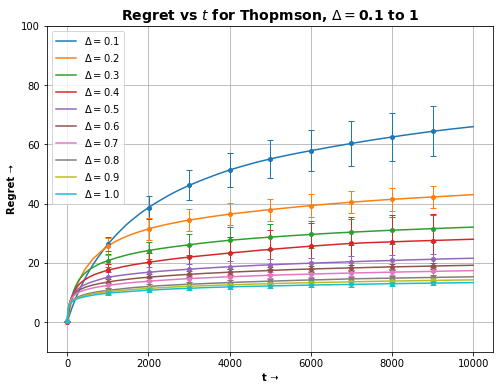

_________________________________________________


In [33]:
# Running Thompson Sampling for all deltas in [0.1, 0.2, ..., 1.0], and plotting the regret curves in a single graph

print("PLEASE SCROLL DOWN IN THIS CELL'S OUTPUT TO SEE THE PLOTS COMPARING THOMPSON REGRET CURVES FOR ALL DELTAS!")
plt.figure(figsize=(8,6))
deltas_list = np.arange(0.1, 1.1, 0.1)
for idx, delt in enumerate(deltas_list):
    thompson_regret_array_delt = thompsonSamp(T2, delt)
    regret_plotter(thompson_regret_array_delt, delta = delt, idx = idx)
plt.title(f"Regret vs $t$ for Thopmson, $\Delta=$0.1 to 1", fontweight = "bold", fontsize = 14)
plt.ylabel("Regret \u279d", fontweight = 'bold')
plt.xlabel("t \u279d", fontweight = 'bold')
plt.grid(True)
plt.ylim((-10,100))
plt.legend()
plt.show()
print("_________________________________________________")

______________________________________________________________________________________________________